<a href="https://colab.research.google.com/github/EriAparicio/Diplo/blob/main/Copia_de_Grupo_14__EntregableAyC_parte_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**


----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


import seaborn
seaborn.set_context('talk')

In [ ]:
url = 'https://raw.githubusercontent.com/EriAparicio/Diplo/main/melb_data_filtered_pd_TP1.csv'
melb_df_2 = pd.read_csv(url)

In [ ]:
melb_df_2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150
13494,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016
13495,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016
13496,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


**Ejercicio 1.1**


In [ ]:
melb_df_2.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'postcode_int'],
      dtype='object')

In [ ]:
#Creamos nuevo df sin las columnas BuildingArea y YearBuilt
melb_df_3 = melb_df_2 [['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'postcode_int']]

melb_df_3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150
13494,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016
13495,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016
13496,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016


**Ejercicio 1.2**


In [ ]:
columns = melb_df_3.columns
for col in columns: 
  length= melb_df_3[col].nunique()
  print(col, length)
  if length < 11:
    print('col:', col)
    print (melb_df_3[col].value_counts())

Suburb 278
Address 13297
Rooms 9
col: Rooms
3     5837
2     3642
4     2664
1      680
5      590
6       66
7       10
8        8
10       1
Name: Rooms, dtype: int64
Type 3
col: Type
h    9373
u    3012
t    1113
Name: Type, dtype: int64
Price 2200
Method 5
col: Method
S     8975
SP    1677
PI    1562
VB    1193
SA      91
Name: Method, dtype: int64
SellerG 264
Date 58
Distance 175
Postcode 163
Bedroom2 12
Bathroom 9
col: Bathroom
1.0    7481
2.0    4925
3.0     915
4.0     106
0.0      34
5.0      28
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64
Car 11
Landsize 1442
CouncilArea 31
Lattitude 6430
Longtitude 6990
Regionname 8
col: Regionname
Southern Metropolitan         4692
Northern Metropolitan         3886
Western Metropolitan          2935
Eastern Metropolitan          1454
South-Eastern Metropolitan     436
Northern Victoria               33
Eastern Victoria                31
Western Victoria                31
Name: Regionname, dtype: int64
Propertycount 275


In [ ]:
#Seleccionamos las Variables que nos parezcan apropiadas y creamos un nuevo dataframe
melb_df_3= melb_df_3 [['Rooms', 'Type','Method', 
                        'Bathroom',
        'Regionname']]

In [ ]:
melb_df_3

,Rooms,Type,Method,Bathroom,Regionname
0,2,h,S,1.0,Northern Metropolitan
1,2,h,S,1.0,Northern Metropolitan
2,3,h,SP,2.0,Northern Metropolitan
3,3,h,PI,2.0,Northern Metropolitan
4,4,h,VB,1.0,Northern Metropolitan
...,...,...,...,...,...
13493,4,h,S,2.0,South-Eastern Metropolitan
13494,3,h,SP,2.0,Western Metropolitan
13495,3,h,S,2.0,Western Metropolitan
13496,4,h,PI,1.0,Western Metropolitan


In [ ]:
# Empezamos realizando el encoding a las variables categoricas del df
# Seleccionamos la variable Type
categorical_cols = ['Type']

melb_df_3[categorical_cols].nunique()

#Chequeamos que no tenga valores nulos
melb_df_3[categorical_cols].isna().sum()

#Vemos los valores que puede tomar la variable Type
melb_df_3.Type.value_counts()

# Creamos las variables binarias
dummies = pd.get_dummies(melb_df_3['Type'], drop_first = False)
dummies.head()

# Añadimos las variables binarias al DataFrame
melb_df_3 = pd.concat([melb_df_3, dummies], axis = 1)

# Eliminamos la vairable original 
melb_df_3 = melb_df_3.drop(columns=['Type'])

melb_df_3.head()

,Rooms,Method,Bathroom,Regionname,h,t,u
0,2,S,1.0,Northern Metropolitan,1,0,0
1,2,S,1.0,Northern Metropolitan,1,0,0
2,3,SP,2.0,Northern Metropolitan,1,0,0
3,3,PI,2.0,Northern Metropolitan,1,0,0
4,4,VB,1.0,Northern Metropolitan,1,0,0


In [ ]:
# Seleccionamos la variable Method
categorical_cols = ['Method']

melb_df_3[categorical_cols].nunique()

#Chequeamos que no tenga valores nulos
melb_df_3[categorical_cols].isna().sum()

#Vemos los valores que puede tomar la variable 
melb_df_3.Method.value_counts()

# Creamos las variables binarias
dummies = pd.get_dummies(melb_df_3['Method'], drop_first = False)
dummies.head()

# Añadimos las variables binarias al DataFrame
melb_df_3 = pd.concat([melb_df_3, dummies], axis = 1)

# Eliminamos la vairable original 
melb_df_3 = melb_df_3.drop(columns=['Method'])

melb_df_3.head()

,Rooms,Bathroom,Regionname,h,t,u,PI,S,SA,SP,VB
0,2,1.0,Northern Metropolitan,1,0,0,0,1,0,0,0
1,2,1.0,Northern Metropolitan,1,0,0,0,1,0,0,0
2,3,2.0,Northern Metropolitan,1,0,0,0,0,0,1,0
3,3,2.0,Northern Metropolitan,1,0,0,1,0,0,0,0
4,4,1.0,Northern Metropolitan,1,0,0,0,0,0,0,1


In [ ]:
# Seleccionamos la variable Regionname
categorical_cols = ['Regionname']

melb_df_3[categorical_cols].nunique()

#Chequeamos que no tenga valores nulos
melb_df_3[categorical_cols].isna().sum()

#Vemos los valores que puede tomar la variable 
melb_df_3.Regionname.value_counts()

# Creamos las variables binarias
dummies = pd.get_dummies(melb_df_3['Regionname'], drop_first = False)
dummies.head()

# Añadimos las variables binarias al DataFrame
melb_df_3 = pd.concat([melb_df_3, dummies], axis = 1)

# Eliminamos la vairable original 
melb_df_3 = melb_df_3.drop(columns=['Regionname'])

melb_df_3.head()

,Rooms,Bathroom,h,t,u,PI,S,SA,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,2.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,3,2.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,4,1.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
melb_df_3 = melb_df_3.rename(columns = {'h': 'Type_h', 't': 'Type_t','u': 'Type_u','PI': 'Method_PI','S': 'Method_S','SA': 'Method_SA','SP': 'Method_SP', 'VB' : 'Method_VB'})
melb_df_3

,Rooms,Bathroom,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,2.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,3,2.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,4,1.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,4,2.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
13494,3,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13495,3,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
13496,4,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

**Ejercicio 2.1**


In [ ]:
# Agregamos al datafame anterior las columnas YearBuilt y BuildingArea
melb_df_4 = pd.concat([melb_df_3, melb_df_2[['YearBuilt', 'BuildingArea']]], axis=1)
melb_df_4

,Rooms,Bathroom,h,t,u,PI,S,SA,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,YearBuilt,BuildingArea
0,2,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN
1,2,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1900.0,79.0
2,3,2.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1900.0,150.0
3,3,2.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN
4,4,1.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,4,2.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1981.0,NaN
13494,3,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1995.0,133.0
13495,3,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1997.0,NaN
13496,4,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1920.0,157.0


**Ejercicio 2.2**

In [ ]:
#Hechamos un vistazo nuevamente al df antes del encoding para tener menos columnas y realizar un mejor análisis de valores faltantes 
y=melb_df_2.sample(10,random_state=123)
print(y)
#Vemos que las variables YearBuilt, BuildingArea y CouncilArea tienen valores faltantes (NaN) con los que tendremos que trabajar

               Suburb            Address  Rooms Type      Price Method  \
12318  Port Melbourne     333 Princes St      3    h  1764000.0      S   
8012      Keilor East         63 Park Dr      3    h   843000.0      S   
19         Abbotsford      42 Valiant St      2    h   890000.0      S   
952    Bentleigh East     2/34 Browns Rd      4    t  1120000.0     PI   
7306         Brooklyn      11 Houston Ct      3    h   892000.0      S   
7223   West Footscray   29 Devonshire St      4    h   710000.0     PI   
11328   Glen Waverley    707 Waverley Rd      5    h  1116500.0      S   
1893     Clifton Hill     3/30 Edmund St      2    u   495000.0      S   
7321         Oakleigh  8/105 Atherton Rd      2    h   305000.0     PI   
12841       Blackburn         2A Kerr St      3    t   881000.0      S   

             SellerG        Date  Distance  Postcode  ...  Car  Landsize  \
12318         Buxton   3/09/2017       3.5    3207.0  ...  NaN     131.0   
8012          Nelson   8/04/2017 

*Análisis de ceros*

In [ ]:
#Si analizamos los ceros:
cols =melb_df_2[melb_df_2 == 0].count(axis=0)
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1021
Landsize        1935
BuildingArea      16
dtype: int64

In [ ]:
#Analisis de Bedroom2 
#Tenemos 16 valores que se indicaron que no hay habitación, si bien existen formato tipo monoambiente en donde la respuesta a esta variable podría ser cero,parece ser un dato faltante.
#Ademas tenemos la variable Rooms que brinda la misma información, si hacemos un entrecruzamiento:
Bedroom2 = melb_df_2.Bedroom2
Rooms = melb_df_2.Rooms
pd.crosstab(Bedroom2,Rooms)
#Podemos notar que la variable Rooms nos brinda muhca mayor información que Bedroom2 por lo que decidimos quitarla del df

fil1_melb_df_2=melb_df_2.copy()
fil1_melb_df_2=fil1_melb_df_2.drop(['Bedroom2'], axis=1)
fil1_melb_df_2.sample(10,random_state=123)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int
12318,Port Melbourne,333 Princes St,3,h,1764000.0,S,Buxton,3/09/2017,3.5,3207.0,...,NaN,131.0,133.00,1900.0,NaN,-37.83509,144.94224,Southern Metropolitan,8648.0,3207
8012,Keilor East,63 Park Dr,3,h,843000.0,S,Nelson,8/04/2017,12.8,3033.0,...,4.0,573.0,176.00,1980.0,Moonee Valley,-37.74730,144.85550,Western Metropolitan,5629.0,3033
19,Abbotsford,42 Valiant St,2,h,890000.0,S,Biggin,17/09/2016,2.5,3067.0,...,1.0,150.0,73.00,1985.0,Yarra,-37.80110,145.00040,Northern Metropolitan,4019.0,3067
952,Bentleigh East,2/34 Browns Rd,4,t,1120000.0,PI,Buxton,28/05/2016,13.9,3165.0,...,2.0,209.0,NaN,NaN,Glen Eira,-37.92130,145.05650,Southern Metropolitan,10969.0,3165
7306,Brooklyn,11 Houston Ct,3,h,892000.0,S,hockingstuart,28/08/2016,10.9,3012.0,...,2.0,715.0,NaN,NaN,Hobsons Bay,-37.82390,144.84310,Western Metropolitan,962.0,3012
7223,West Footscray,29 Devonshire St,4,h,710000.0,PI,Sweeney,4/03/2017,8.2,3012.0,...,1.0,255.0,131.00,1920.0,Maribyrnong,-37.79060,144.86870,Western Metropolitan,5058.0,3012
11328,Glen Waverley,707 Waverley Rd,5,h,1116500.0,S,Harcourts,15/07/2017,16.7,3150.0,...,2.0,701.0,182.85,1960.0,Monash,-37.88902,145.16678,Eastern Metropolitan,15321.0,3150
1893,Clifton Hill,3/30 Edmund St,2,u,495000.0,S,iTRAK,13/08/2016,3.4,3068.0,...,1.0,515.0,50.00,1970.0,Yarra,-37.78750,145.00490,Northern Metropolitan,2954.0,3068
7321,Oakleigh,8/105 Atherton Rd,2,h,305000.0,PI,Ray,4/06/2016,14.0,3166.0,...,1.0,0.0,80.00,1960.0,Monash,-37.89940,145.09550,Southern Metropolitan,3224.0,3166
12841,Blackburn,2A Kerr St,3,t,881000.0,S,Jellis,19/08/2017,13.4,3130.0,...,1.0,300.0,NaN,NaN,NaN,-37.81156,145.14057,Eastern Metropolitan,5713.0,3130


In [ ]:
#Análisis de Bathroom
#Tenemos 34 valores con cero y por lógica suponemos que son valores perdidos.
#Hacemos un entrecruzamiento con Rooms

Bathroom = fil1_melb_df_2.Bathroom
pd.crosstab(Bathroom,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bathroom,,,,,,,,,
0.0,1,19,11,3,0,0,0,0,0
1.0,673,3113,3225,451,17,2,0,0,0
2.0,6,502,2440,1697,255,20,3,2,0
3.0,0,8,153,469,243,34,5,2,1
4.0,0,0,5,41,47,9,2,2,0
5.0,0,0,1,2,25,0,0,0,0
6.0,0,0,2,0,2,1,0,0,0
7.0,0,0,0,0,1,0,0,1,0
8.0,0,0,0,1,0,0,0,1,0


In [ ]:
#Observamos que la mayoria de los datos que tienen cero se centran en los inmuebles que tienen menor a 3 habitaciones, por lo que vamos a suponer que en donde no se listan baños, existe al menos uno.
fil1_melb_df_2.loc[fil1_melb_df_2.Bathroom<1,'Bathroom']=1

#Verificamos que no haya mas ceros en Bathroom
cols2 = fil1_melb_df_2[fil1_melb_df_2 == 0].count(axis=0)
cols2[cols2 > 0]

Distance           6
Car             1021
Landsize        1935
BuildingArea      16
dtype: int64

In [ ]:
#Analisis de Car: es la cantidad de lugares para colocar el auto. Consideramos que son valores validos porque entra dentro de lo logico que no todos los inmuebles tengan un lugar para estacionar su auto.
#Análisis de Distance: es la distancia desde el centro empresarial, cultural y gastronomico de Melbourne. Esto valores de cero se pueden explicar suponiendo que estos inmuebles están dentro del centro, por ende los consideramos valores validos.
#VER LANDSIZE 

*Análisis de datos faltantes NAN*

In [ ]:
#Detectamos las columnas que tienen valores NaN
missing_values_count = fil1_melb_df_2.isna().sum()
missing_values_count

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                61
Landsize            0
BuildingArea     6413
YearBuilt        5338
CouncilArea      1352
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
postcode_int        0
dtype: int64

In [ ]:
#Análisis de NAN en CouncilArea
#Decidimos eliminar la columan CouncilArea ya que su valor no es relevante para el análisis que nos interesa
fil1_melb_df_2 = fil1_melb_df_2.drop('CouncilArea',axis=1)

#Verificamos que hay sido eliminada
fil1_melb_df_2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'postcode_int'],
      dtype='object')

In [ ]:
#Análisis de NaN en Car
#Calculo la media de los valores de Car (no tiene en cuenta los nulos)
#Para que calcula esto: fil1_melb_df_2['Car'].mean()

#Elimiación completa de nulos 
fil1_melb_df_2.dropna(subset=['Car'],how='any',inplace=True)

#Verificación si hay nulos 
fil1_melb_df_2['Car'].isnull().sum()

0

*Análisis de Nulos en YearBuilt y BuildingArea*

Para estimar los valores NaN de estas variables realizamos una técnica avanzada de imputación denominada Multivariate feature imputation para esto y siguiendo la consigna vamos a aplicar una instancia de IterativeImputer con un estimador KNeighborsRegressor para imputar los valores de las variables.
Esta tecnica no permite tener un df con variables de distinto tipo, como en este caso las variables que queremos imputar son numericas no hay que realizar ningun encodi

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.impute import IterativeImputer

melb_data_mice = fil1_melb_df_2.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt','BuildingArea']])



melb_data_mice.sample(10)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,postcode_int
6178,Surrey Hills,6/402 Whitehorse Rd,2,u,520000.0,S,Woodards,27/06/2016,11.2,3127.0,1.0,1.0,0.0,200.746,1971.8,-37.81380,145.08790,Southern Metropolitan,5457.0,3127
11333,Greensborough,13 Stowe Av,4,h,800000.0,S,Darren,15/07/2017,16.1,3088.0,2.0,2.0,626.0,169.000,1960.0,-37.70859,145.10464,Northern Metropolitan,8524.0,3088
6609,Yallambie,70 Tarcoola Dr,3,h,810000.0,S,Buckingham,10/12/2016,15.0,3085.0,2.0,2.0,568.0,173.000,1975.0,-37.72160,145.10660,Northern Metropolitan,1369.0,3085
1651,Canterbury,4/34 Rochester Rd,2,u,722000.0,S,Jellis,12/11/2016,9.0,3126.0,1.0,1.0,0.0,92.000,1965.0,-37.82050,145.08280,Southern Metropolitan,3265.0,3126
10333,Keilor East,10 Cecelia Dr,3,h,806000.0,S,Barry,27/05/2017,11.7,3033.0,2.0,4.0,546.0,200.746,1971.8,-37.74761,144.85210,Western Metropolitan,5629.0,3033
4690,Pascoe Vale,4/305 Cumberland Rd,1,u,248500.0,S,Brad,28/08/2016,9.9,3044.0,1.0,1.0,49.0,49.000,1970.0,-37.71520,144.94020,Northern Metropolitan,7485.0,3044
9318,St Kilda,24/62 Wellington St,1,u,451000.0,S,Marshall,3/06/2017,5.0,3182.0,1.0,1.0,0.0,200.746,1971.8,-37.85705,144.98699,Southern Metropolitan,13240.0,3182
6913,Fawkner,39 Lynch Rd,3,h,751000.0,S,Stockdale,17/09/2016,12.4,3060.0,6.0,2.0,592.0,103.000,1960.0,-37.71200,144.97190,Northern Metropolitan,5070.0,3060
7720,Caulfield South,9/434 Kooyong Rd,2,u,630000.0,S,Biggin,20/05/2017,9.3,3162.0,1.0,1.0,0.0,71.000,2003.0,-37.89370,145.01370,Southern Metropolitan,5051.0,3162
1233,Brighton East,16b Regent St,3,t,1511000.0,S,RT,24/09/2016,10.7,3187.0,2.0,2.0,496.0,200.746,1971.8,-37.92370,145.00750,Southern Metropolitan,6938.0,3187


In [ ]:
#Verificación si hay nulos 
melb_data_mice[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt       0
BuildingArea    0
dtype: int64

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

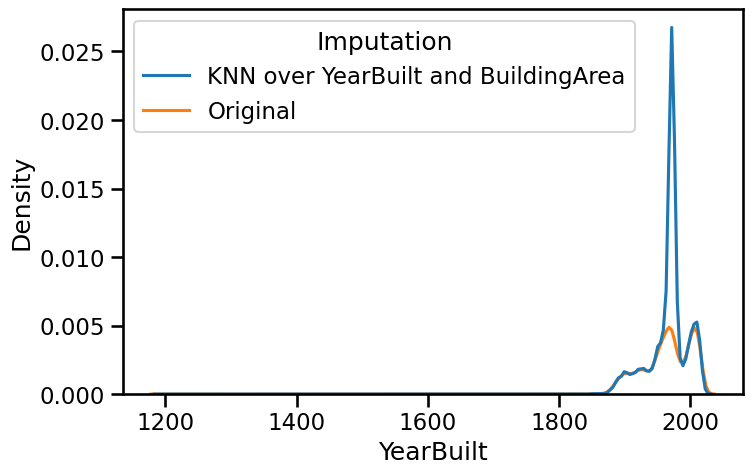

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = fil1_melb_df_2.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13498, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


NameError: ignored

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
